In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipywidgets import interact

In [14]:

def read_data(path='data/last_data.data'):

    with open(path, 'rb') as file:
        temp = pickle.load(file)

    return temp

def load_btn_callback2(fname):
    d_list, _, _, _ = read_data('data/'+fname)

    return d_list

def norm(index=0):
    suma = data_list[index].copy()
    suma = (np.abs(suma)**2)
    suma = np.sum(suma)

    return suma


# def Integral(index, x):
#     suma = data_list[index].copy()
#     suma = np.resize(suma, (L,W))
#     suma = (np.abs(suma[x,:])**2)
#     suma = np.sum(suma)
#
#     return suma

def Transmission(data_list, x):
    from scipy.constants import physical_constants


    h_bar = physical_constants['Planck constant over 2 pi'][0]  #J*s
    hh = physical_constants['Planck constant'][0]  #J*s
    m_el = physical_constants['electron mass'][0]              #kg
    eV_unit = physical_constants['electron volt'][0]            #J
    el_charge = physical_constants['elementary charge'][0]
    k_B = physical_constants['Boltzmann constant'][0]
    k_B_eV = k_B/eV_unit




    m_ef = 0.041*m_el

    b = 0
    dx=1
    f=0.5
    f_2=0.5


    J= np.zeros((len(data_list)), dtype="complex")
    for index in range(len(data_list)):
        PsiTab = data_list[index].copy()
        PsiTab = np.resize(PsiTab, (L,W))
        for j in range(W):
            J[index] += -1j*f_2*( np.conj(PsiTab[x][j])*(PsiTab[x+1][j] - PsiTab[x-1][j])/(2*dx)
                                - PsiTab[x][j]*(np.conj(PsiTab[x+1][j]) - np.conj(PsiTab[x-1][j]))/(2*dx) )- \
                                4*f*b*j*np.conj(PsiTab[x][j])*PsiTab[x][j]
    return J

T =  (1.2844336361175033+0j)


C:\Users\quake\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


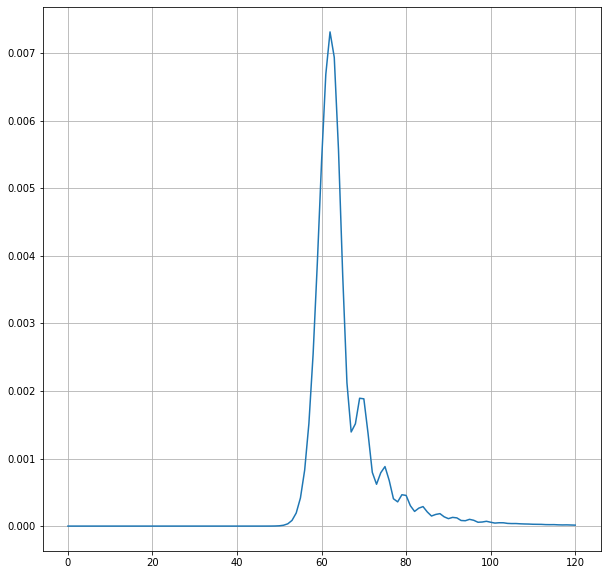

In [22]:
plt.rcParams["figure.figsize"] = (10,10)
data_list = load_btn_callback2("vel_test.data")

L = 800
W = 200
x_gate = 400
dt = 20

J_list = Transmission(data_list, x_gate)

T = np.sum(J_list) * dt

print( "T = ", T)

plt.plot(J_list)
plt.grid()
#plt.axvline(x_gate, ymin=0, ymax=1, c="r", label="gate")
plt.show()



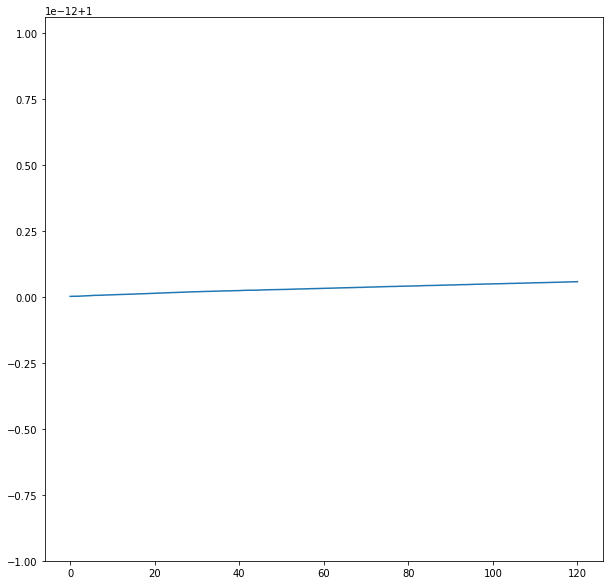

In [23]:
norm_list = [norm(index) for index in range(len(data_list))]
plt.plot(norm_list)
